# CAPRIN figures 
Includes Fig. 5F and Fig. S13

In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.25
plt.rcParams['xtick.major.size'] = 1.5  # length of major xticks
plt.rcParams['xtick.major.width'] = 0.3  # width of major xticks
plt.rcParams['ytick.major.size'] = 1.5  # length of major yticks
plt.rcParams['ytick.major.width'] = 0.3   # width of major yticks

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)
import metapredict as meta


In [2]:
from finches import Mpipi_frontend, CALVADOS_frontend
from sparrow import Protein

In [3]:
mf = Mpipi_frontend()
cf = CALVADOS_frontend()

# location of Kim et al. peptide regions identified by badass NMR (in positions
# for the seq here with idx1 numbering
interaction_peptides = [[18,21], [32,35],[54,61]]

# caprin region of interest
cap = 'SRGVSRGGSRGARGLMNGYRGPANGFRGGYDGYRPSFSNTPNSGYTQSQFSAPRDYSGYQRDGYQQNFKRGSGQSGPRGAPRGRGGPPRPNRGMPQMNTQQVN'



/Users/alex/Dropbox/WASHU/Holehouse/tools/finches/finches/finches/forcefields/calvados.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.038286503882254706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  r.loc['H','q'] = 1. / ( 1 + 10**(self.pH-6) )


## Fig. S13A
Disorder profile for CARPIN with the 608-709 fragment highlighted.

IDR: 1-49
IDR: 248-709


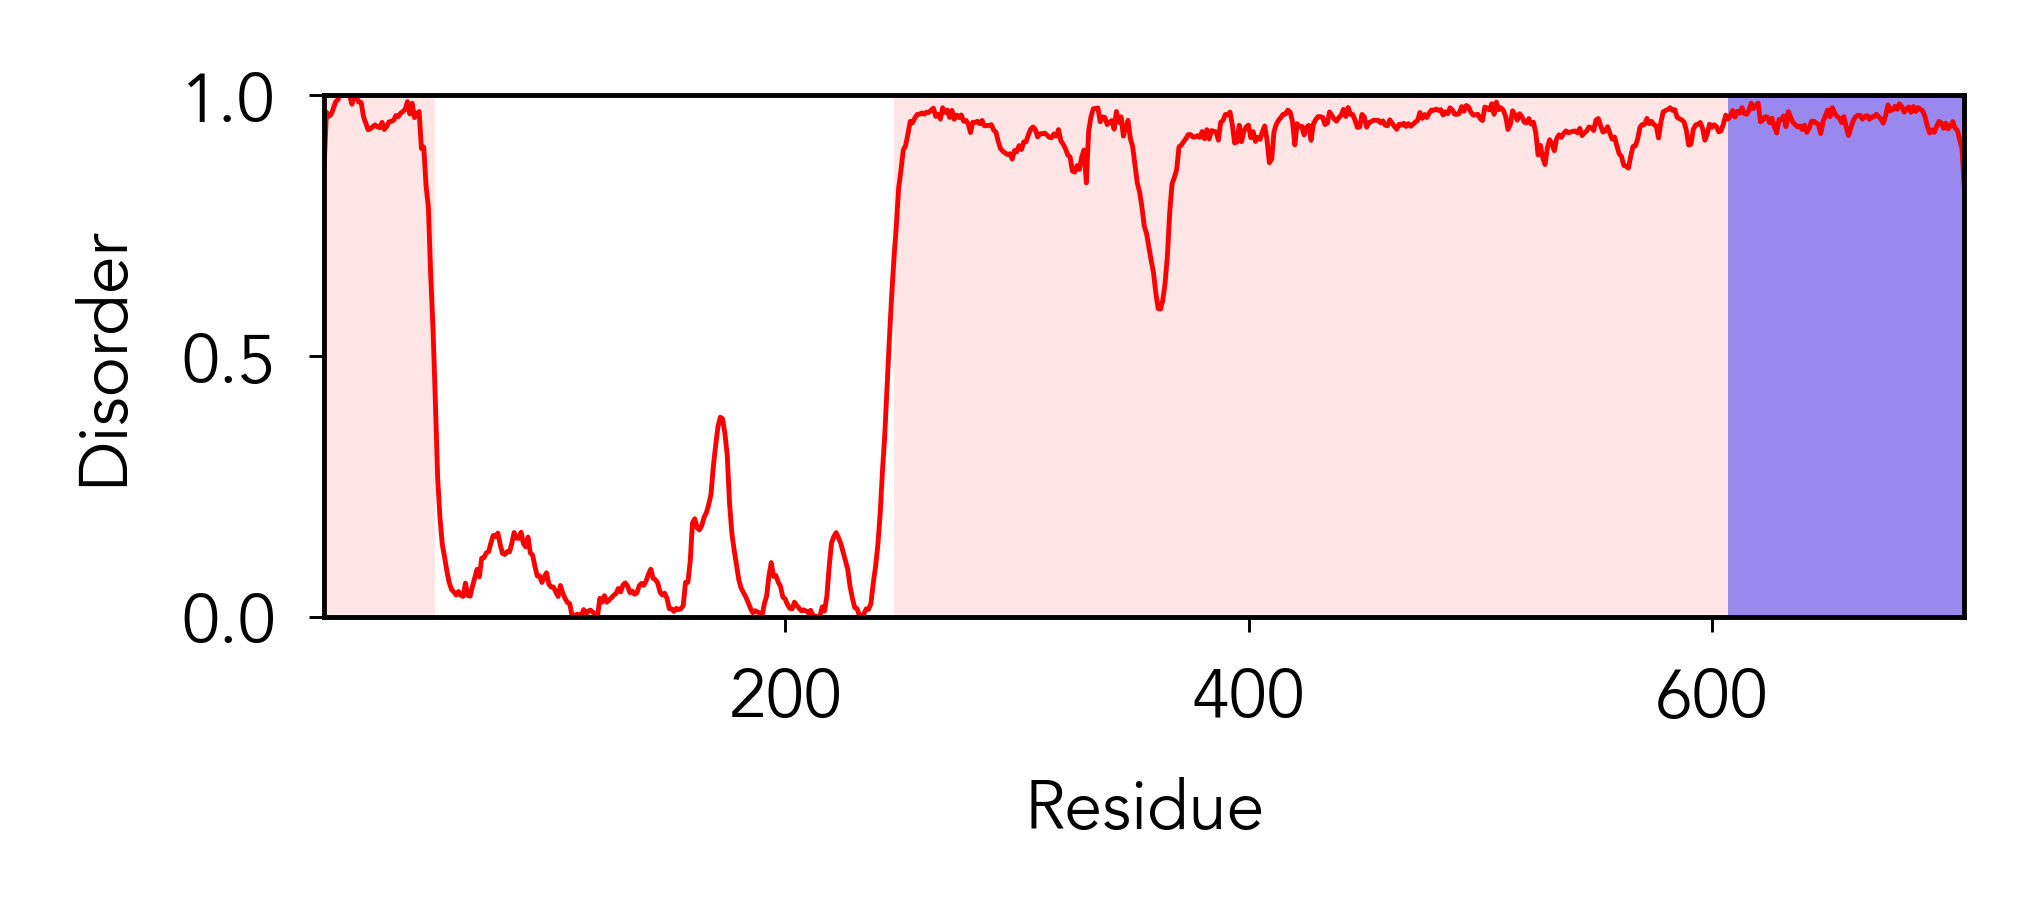

In [10]:
fl_caprin = 'MPSATSHSGSGSKSSGPPPPSGSSGSEAAAGAGAAAPASQHPATGTGAVQTEAMKQILGVIDKKLRNLEKKKGKLDDYQERMNKGERLNQDQLDAVSKYQEVTNNLEFAKELQRSFMALSQDIQKTIKKTARREQLMREEAEQKRLKTVLELQYVLDKLGDDEVRTDLKQGLNGVPILSEEELSLLDEFYKLVDPERDMSLRLNEQYEHASIHLWDLLEGKEKPVCGTTYKVLKEIVERVFQSNYFDSTHNHQNGLCEEEEAASAPAVEDQVPEAEPEPAEEYTEQSEVESTEYVNRQFMAETQFTSGEKEQVDEWTVETVEVVNSLQQQPQAASPSVPEPHSLTPVAQADPLVRRQRVQDLMAQMQGPYNFIQDSMLDFENQTLDPAIVSAQPMNPTQNMDMPQLVCPPVHSESRLAQPNQVPVQPEATQVPLVSSTSEGYTASQPLYQPSHATEQRPQKEPIDQIQATISLNTDQTTASSSLPAASQPQVFQAGTSKPLHSSGINVNAAPFQSMQTVFNMNAPVPPVNEPETLKQQNQYQASYNQSFSSQPHQVEQTELQQEQLQTVVGTYHGSPDQSHQVTGNHQQPPQQNTGFPRSNQPYYNSRGVSRGGSRGARGLMNGYRGPANGFRGGYDGYRPSFSNTPNSGYTQSQFSAPRDYSGYQRDGYQQNFKRGSGQSGPRGAPRGRGGPPRPNRGMPQMNTQQVN'
figure(None, (3,1.4), dpi=350)
ax = plt.gca()
seq = fl_caprin
idx = np.arange(1,len(seq)+1)
plt.plot(idx, meta.predict_disorder(seq,version=2), color='r', lw=0.5)
doms = meta.predict_disorder_domains(seq)
for d in doms.disordered_domain_boundaries:
    print(f"IDR: {d[0]+1}-{d[1]}")
    ax.axvspan(d[0],d[1],lw=0, color='r', alpha=0.1)

ax.axvspan(607,709,color='b',lw=0,alpha=0.4)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('Residue',fontsize=7)
plt.ylabel('Disorder',fontsize=7)
plt.ylim([0,1])
plt.xlim([1,idx[-1]])
plt.tight_layout()
plt.savefig('out_figures/disorder_caprin1.pdf')

## Fig 5F
Per-residue linear comparison with respect to residues in CAPRIN1 IDR undergoing self interaction. 

NOTE: To align the Mpipi vs. CALVADOS profiles more clearly on the same axis, for this figure we use a 1.8x factor to rescale the Mpipi values. We do this only for visual asthetics, in principle you would never quantitatively compare Mpipi and CALVADOS profiles, as the absolute values are not 1:1 due to differences in the underlying forcefield, so again we emphasize this 1.8x factor is a fudge factor for easy plotting ONLY and has NO physical meaning.

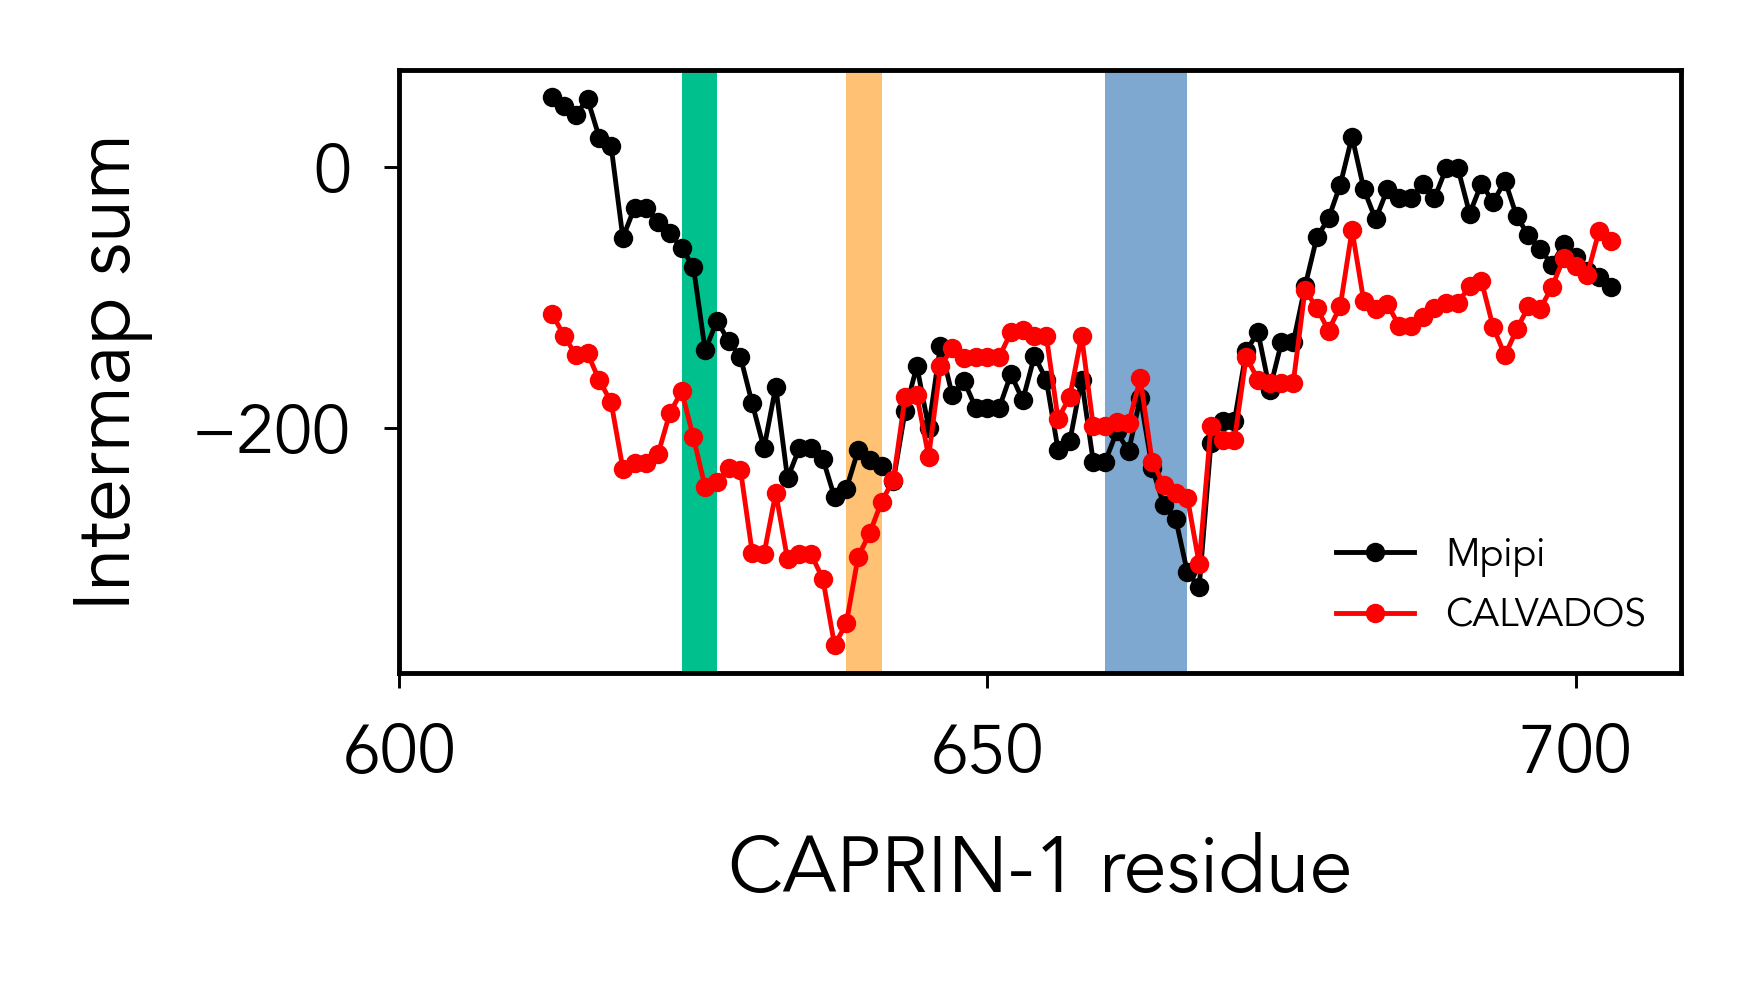

In [6]:
figure(None, (2.6,1.5), dpi=350)
ax = plt.gca()

FUDGE_FACTOR_FOR_PLOTTING = 1.8

A_mf = mf.intermolecular_idr_matrix(cap,cap,window_size=13)
A_cf = cf.intermolecular_idr_matrix(cap,cap,window_size=13)


offset = 606
plt.plot(A_mf[0][1]+offset, FUDGE_FACTOR_FOR_PLOTTING*np.sum(A_mf[0][0],0),'.k-',  ms=4, mew=0, lw=0.5, label='Mpipi')
plt.plot(A_cf[0][1]+offset, 1*np.sum(A_cf[0][0],0),'.r-', ms=4, mew=0, lw=0.5, label='CALVADOS')
ax = plt.gca()

d = interaction_peptides[0]
ax.axvspan(d[0]+offset, d[1]+offset,alpha=1, lw=0, color='#00C08D')

d = interaction_peptides[1]
ax.axvspan(d[0]+offset, d[1]+offset,alpha=1, lw=0, color='#FFC174')

d = interaction_peptides[2]
ax.axvspan(d[0]+offset, d[1]+offset,alpha=1, lw=0, color='#7EA8D0')

plt.legend(fontsize=4,frameon=False)

plt.xlim([600,709])    

plt.xlabel('CAPRIN-1 residue', fontsize=8)
plt.ylabel('Intermap sum', fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()
plt.savefig('out_figures/caprin.pdf')


## Fig 5F with null correction
Per-residue linear comparison with respect to residues in CAPRIN1 IDR undergoing self interaction using null correction.

We don't actually include this in the paper but essentially show if you use the null shuffle correction all the conclusions remain the same

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 248.23it/s]


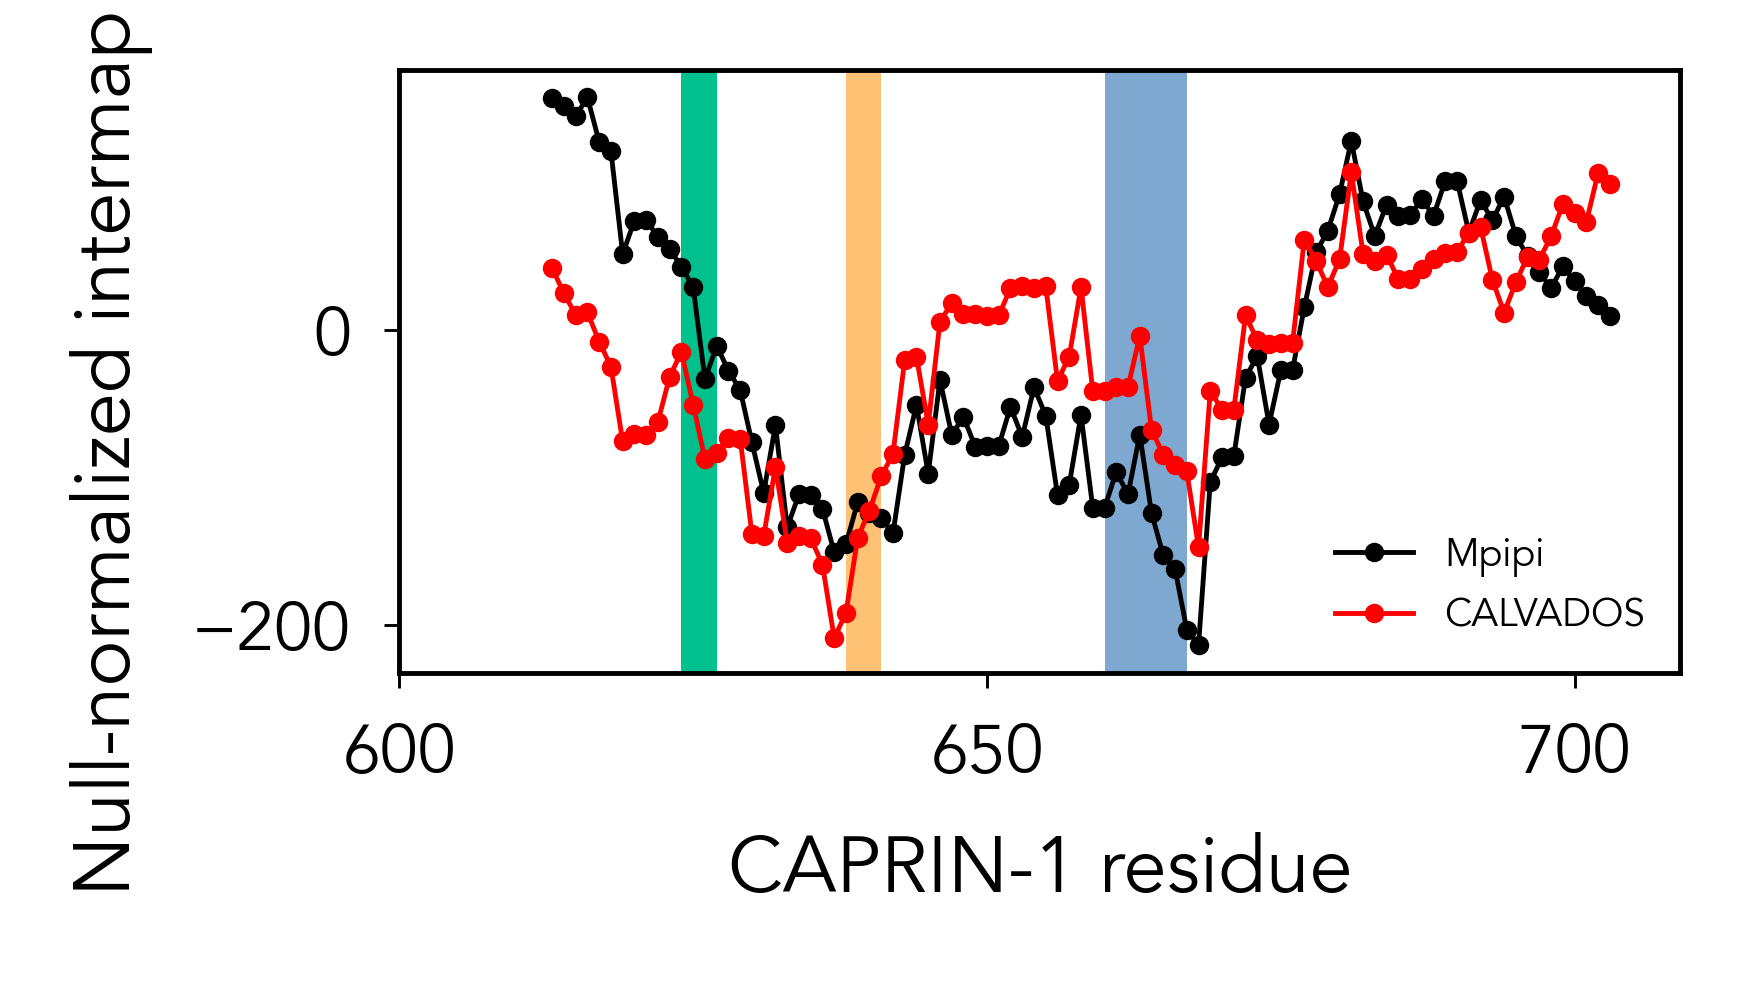

In [7]:
figure(None, (2.6,1.5), dpi=350)
ax = plt.gca()


A_mf = mf.intermolecular_idr_matrix(cap,cap,window_size=13, null_shuffle=1000)
A_cf = cf.intermolecular_idr_matrix(cap,cap,window_size=13, null_shuffle=1000)


offset = 606
plt.plot(A_mf[0][1]+offset, 1.8*np.sum(A_mf[0][0],0),'.k-',  ms=4, mew=0, lw=0.5, label='Mpipi')
plt.plot(A_cf[0][1]+offset, 1*np.sum(A_cf[0][0],0),'.r-', ms=4, mew=0, lw=0.5, label='CALVADOS')
ax = plt.gca()

d = interaction_peptides[0]
ax.axvspan(d[0]+offset, d[1]+offset,alpha=1, lw=0, color='#00C08D')

d = interaction_peptides[1]
ax.axvspan(d[0]+offset, d[1]+offset,alpha=1, lw=0, color='#FFC174')

d = interaction_peptides[2]
ax.axvspan(d[0]+offset, d[1]+offset,alpha=1, lw=0, color='#7EA8D0')

plt.legend(fontsize=4,frameon=False)

plt.xlim([600,709])    

plt.xlabel('CAPRIN-1 residue', fontsize=8)
plt.ylabel('Null-normalized intermap sum', fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()
plt.savefig('out_figures/caprin_null_shuffle.pdf')


## Figure S13 B
Note we again compute the null shuffle corrected intermap for completeness but this is not actually included in the paper.

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 243.85it/s]


(<Figure size 2975x2975 with 4 Axes>,
 <Axes: >,
 <Axes: >,
 <Axes: >,
 <Axes: >)

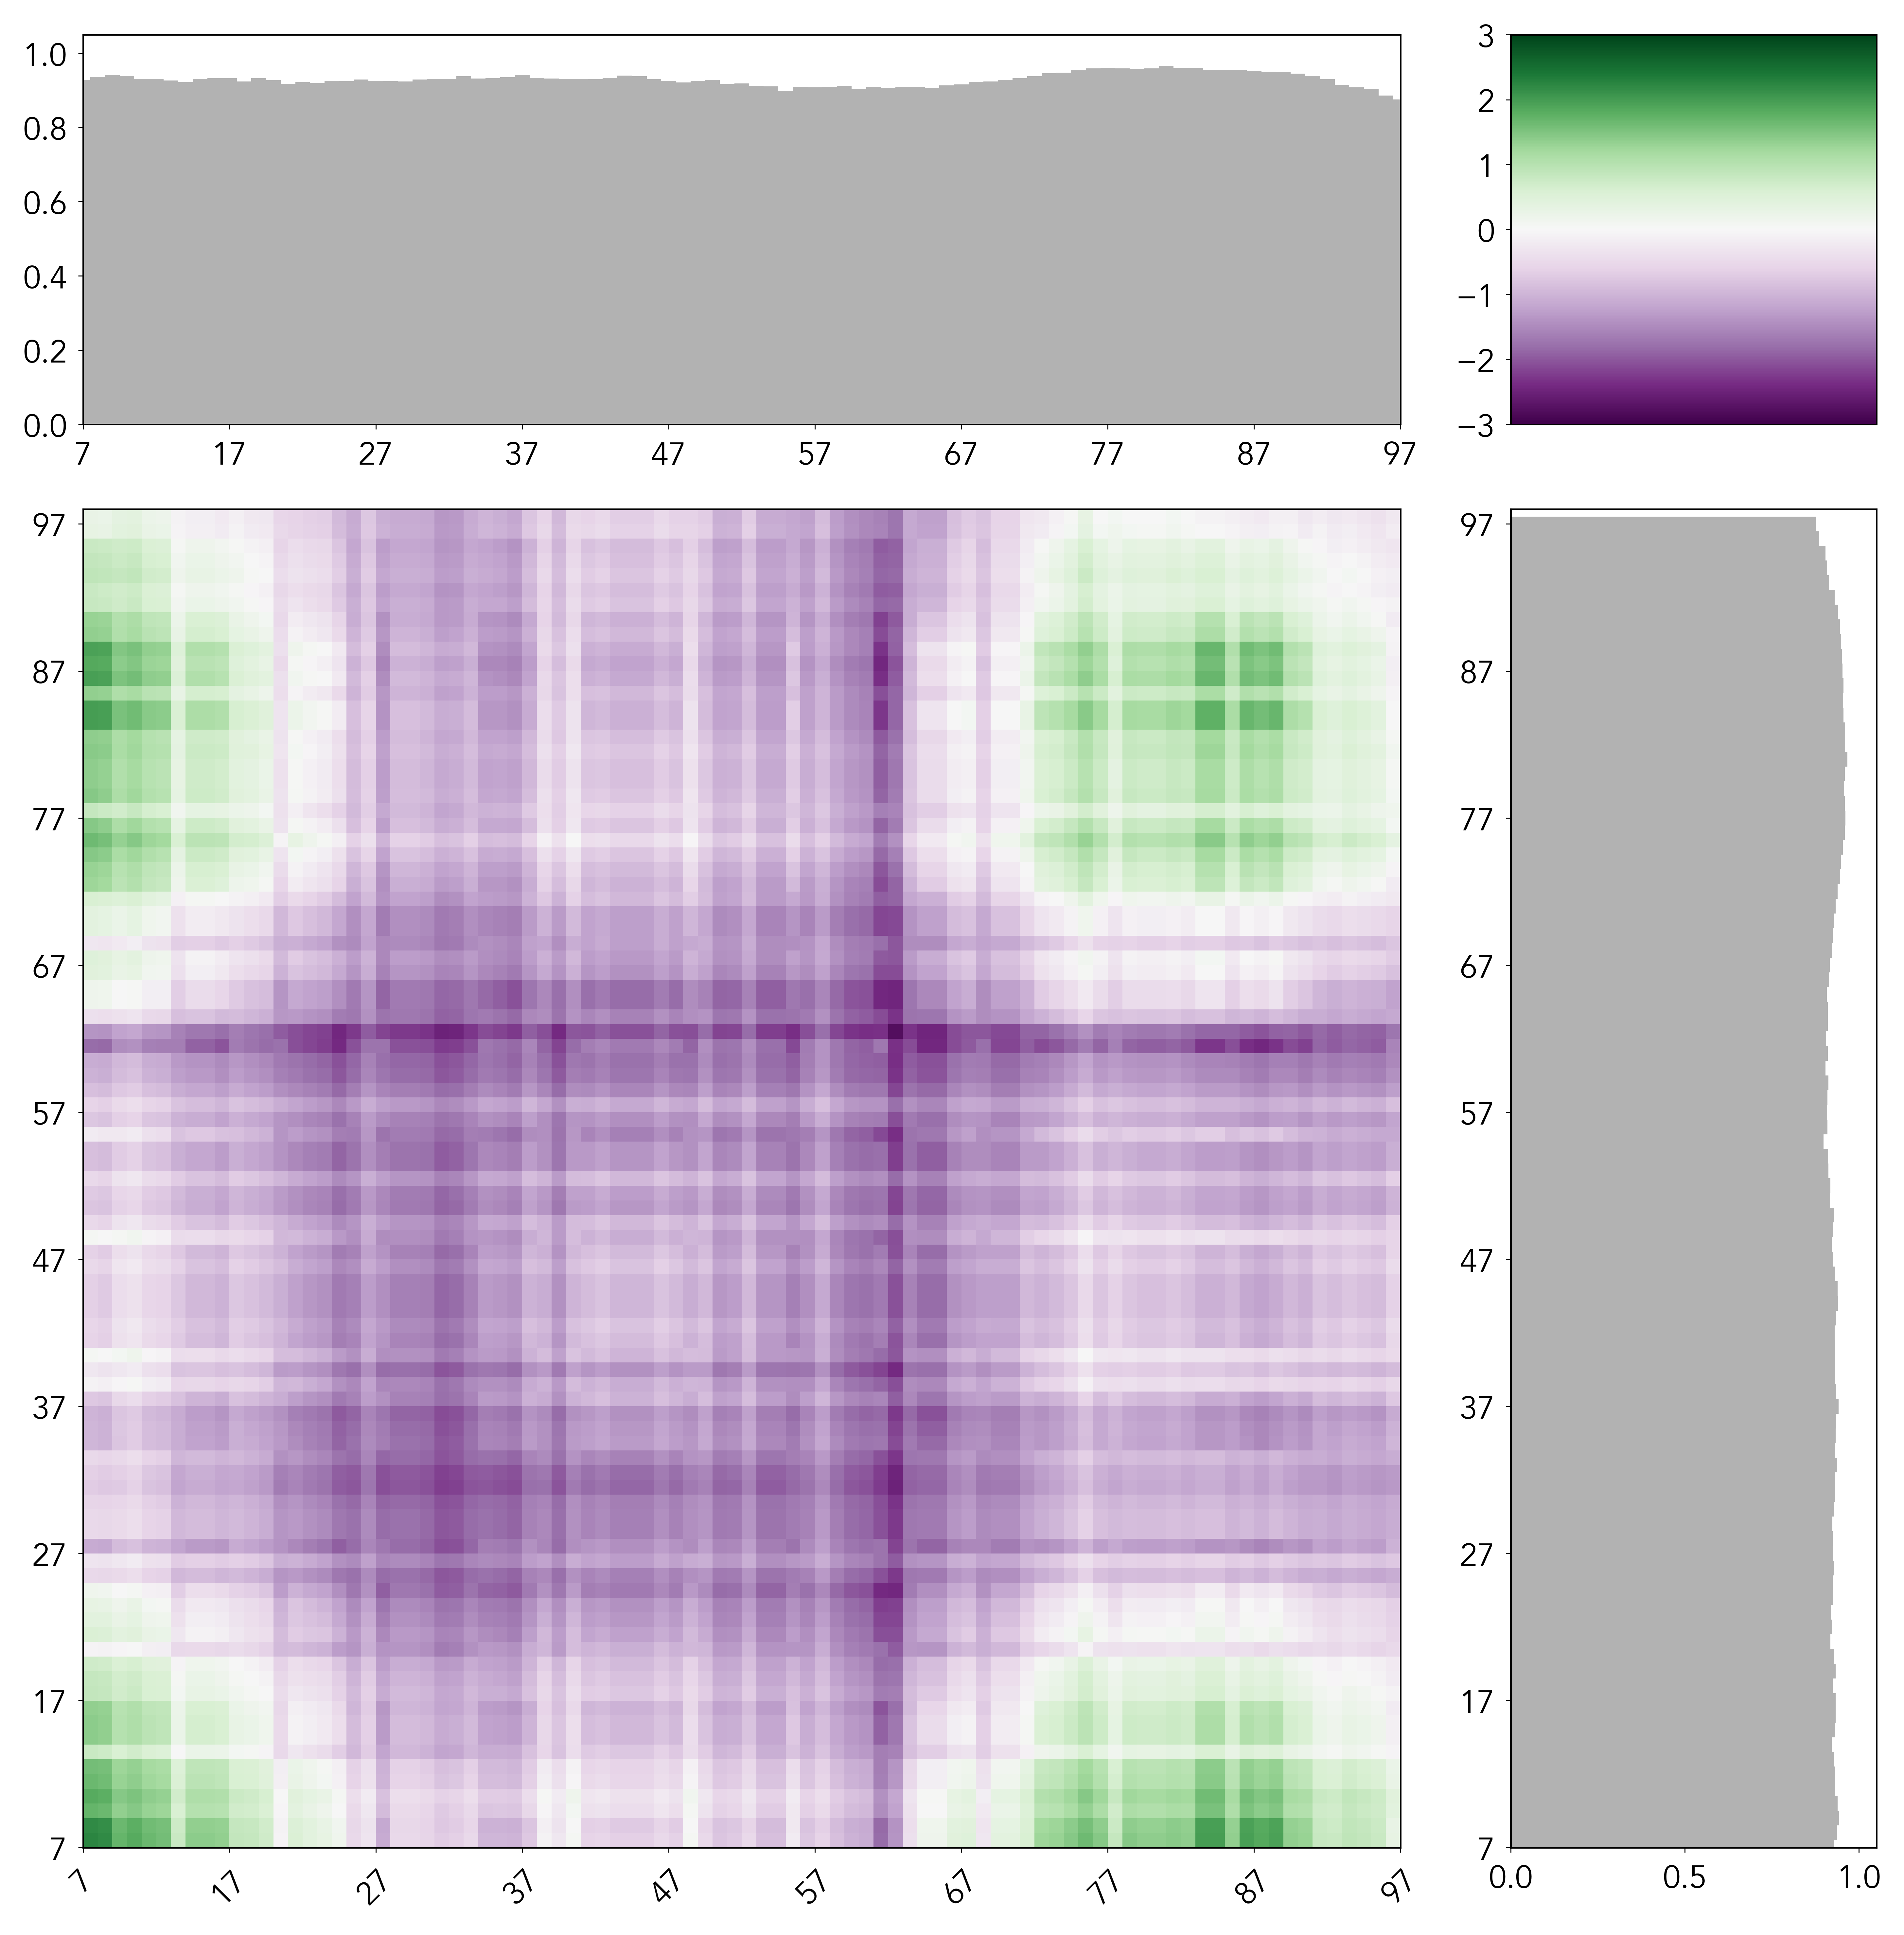

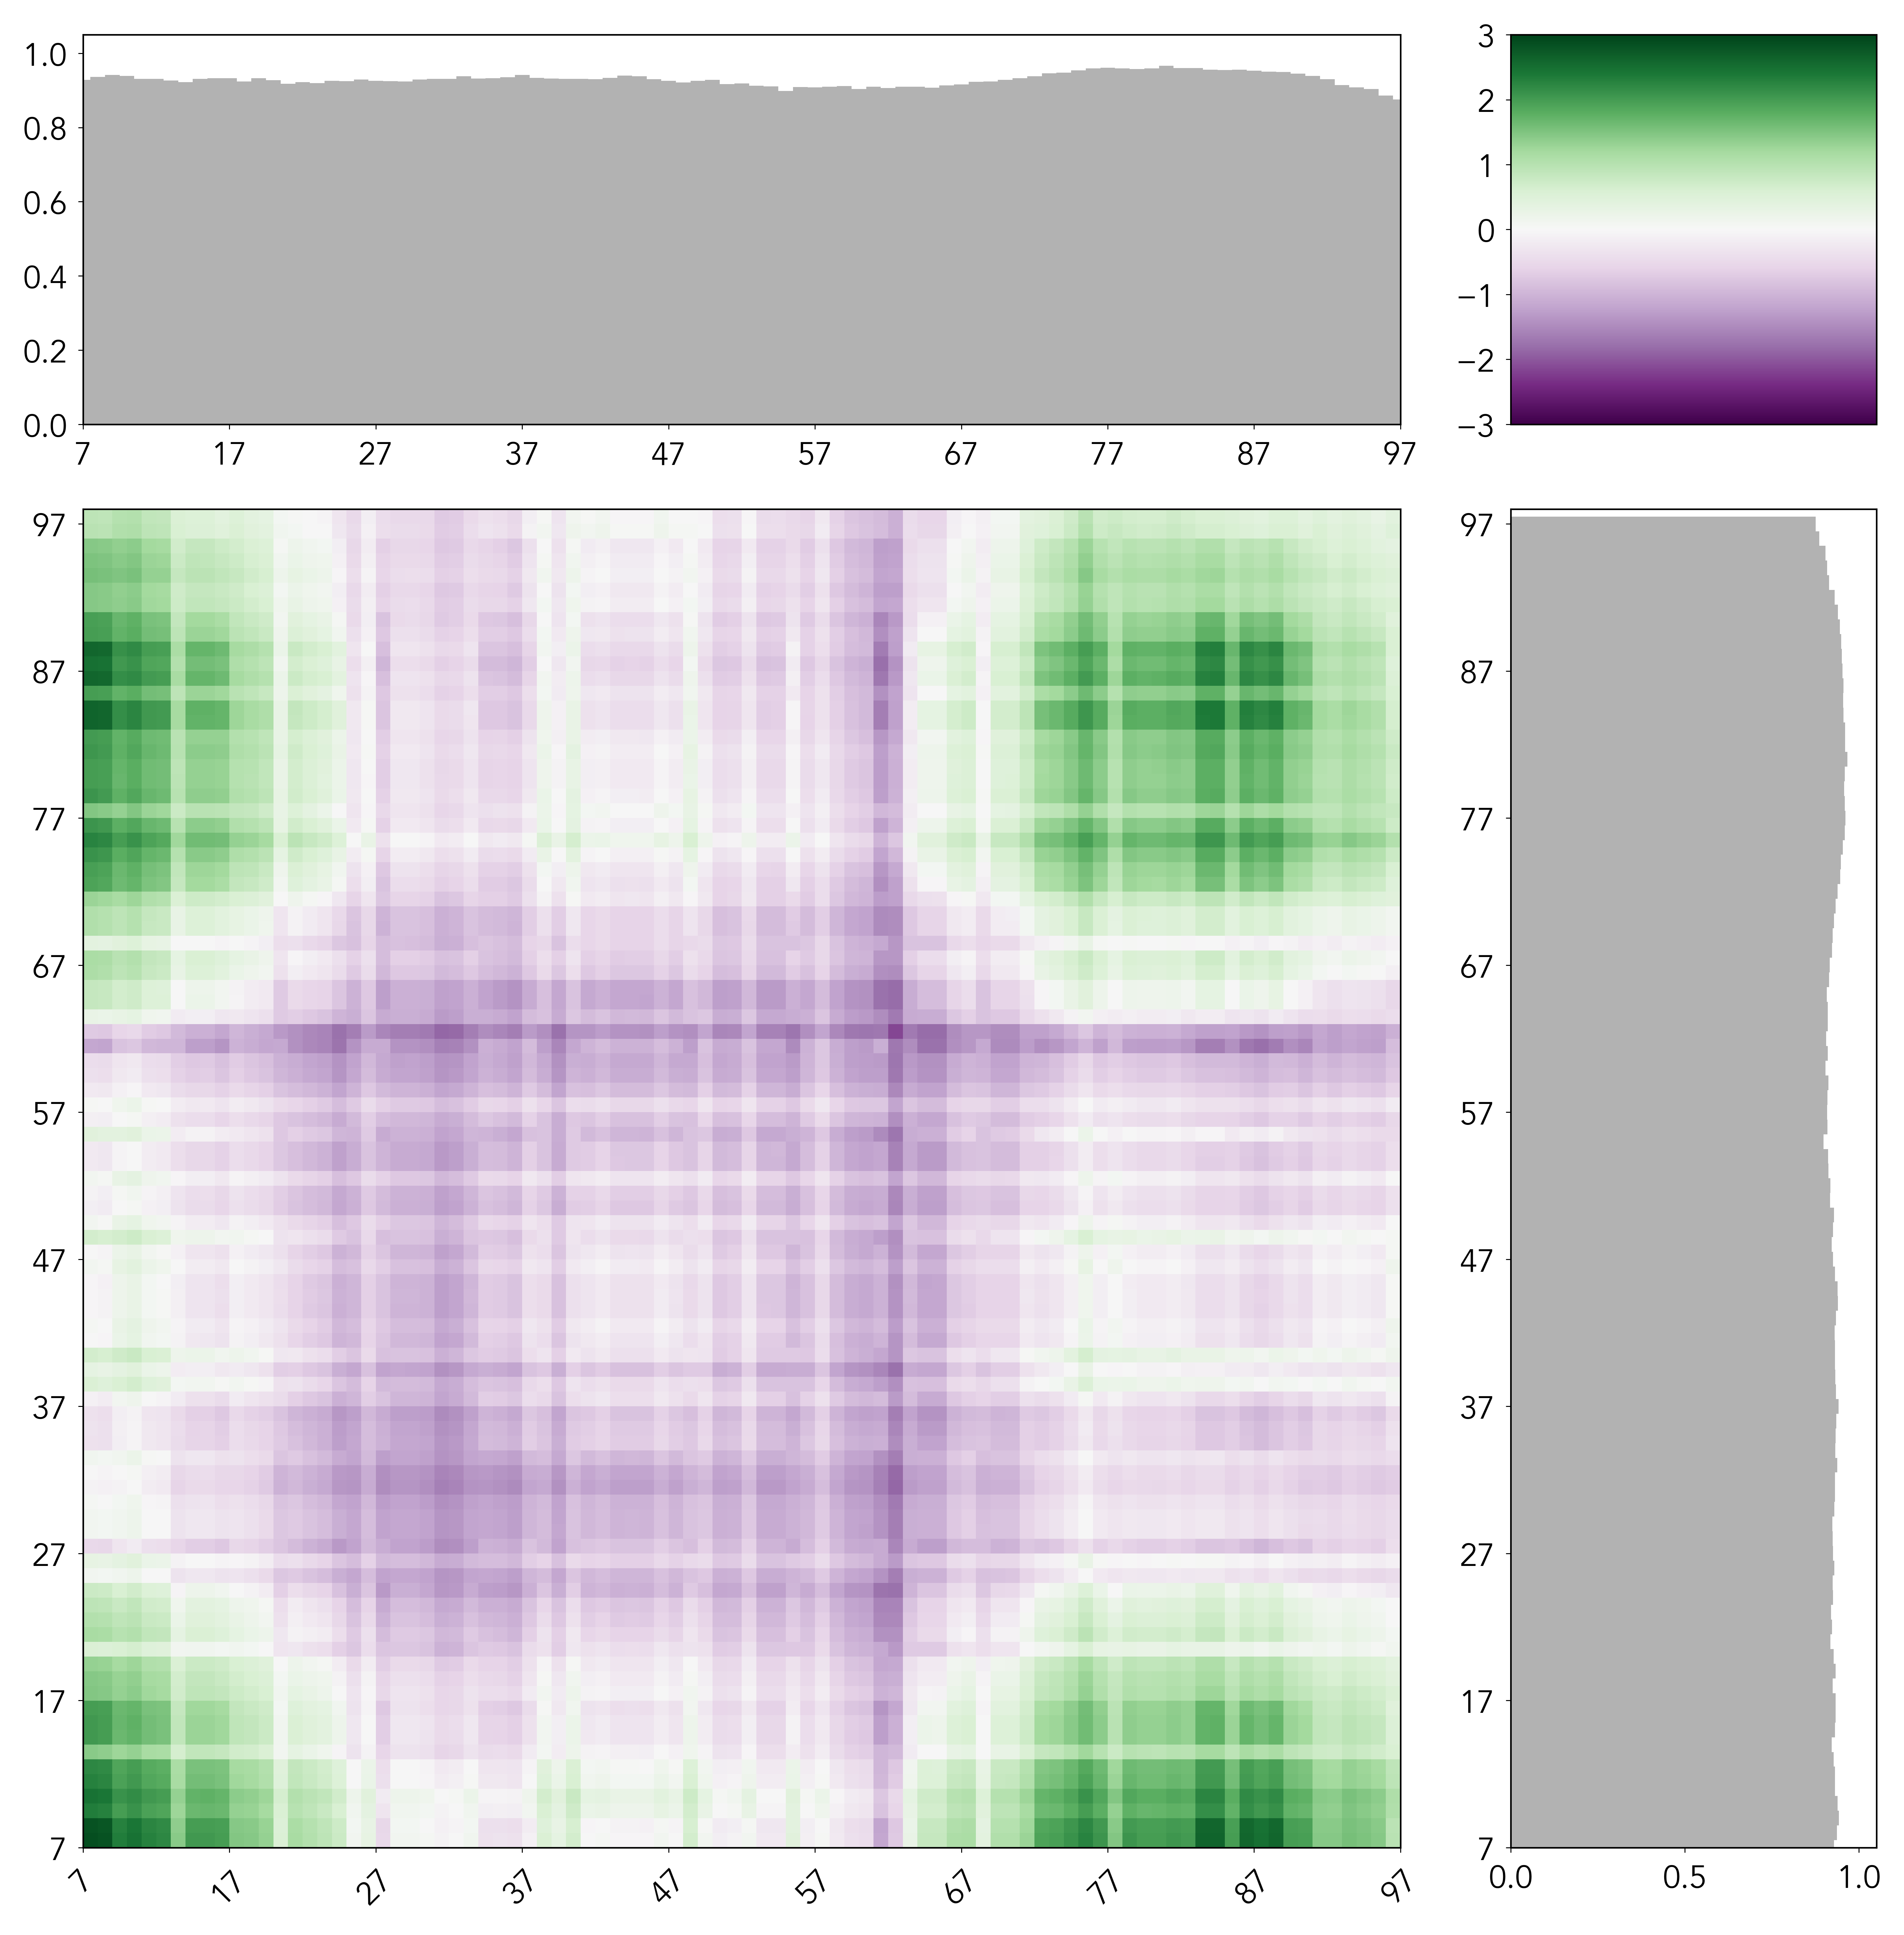

In [9]:
mf.interaction_figure(cap,cap, window_size=13, fname='out_figures/caprin_intermap.pdf', tic_frequency=10)
mf.interaction_figure(cap,cap, window_size=13, fname='out_figures/caprin_intermap_null_normalized.pdf', tic_frequency=10, null_shuffle=1000)

# Fig S13C
Salt dependent phase diagrams for CAPRIN-1. Note this shows the correct salt dependence when compared to experimental data from Kim et al. PNAS (2021), with Fig. 3A from this work reproduced below for convenience.

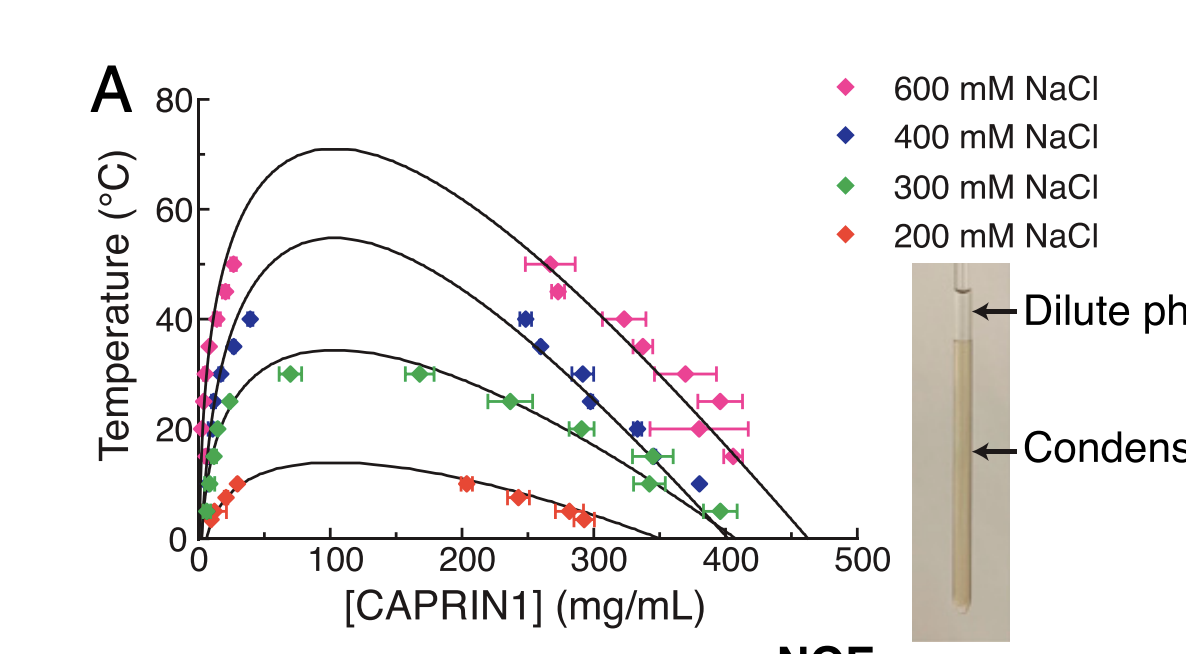

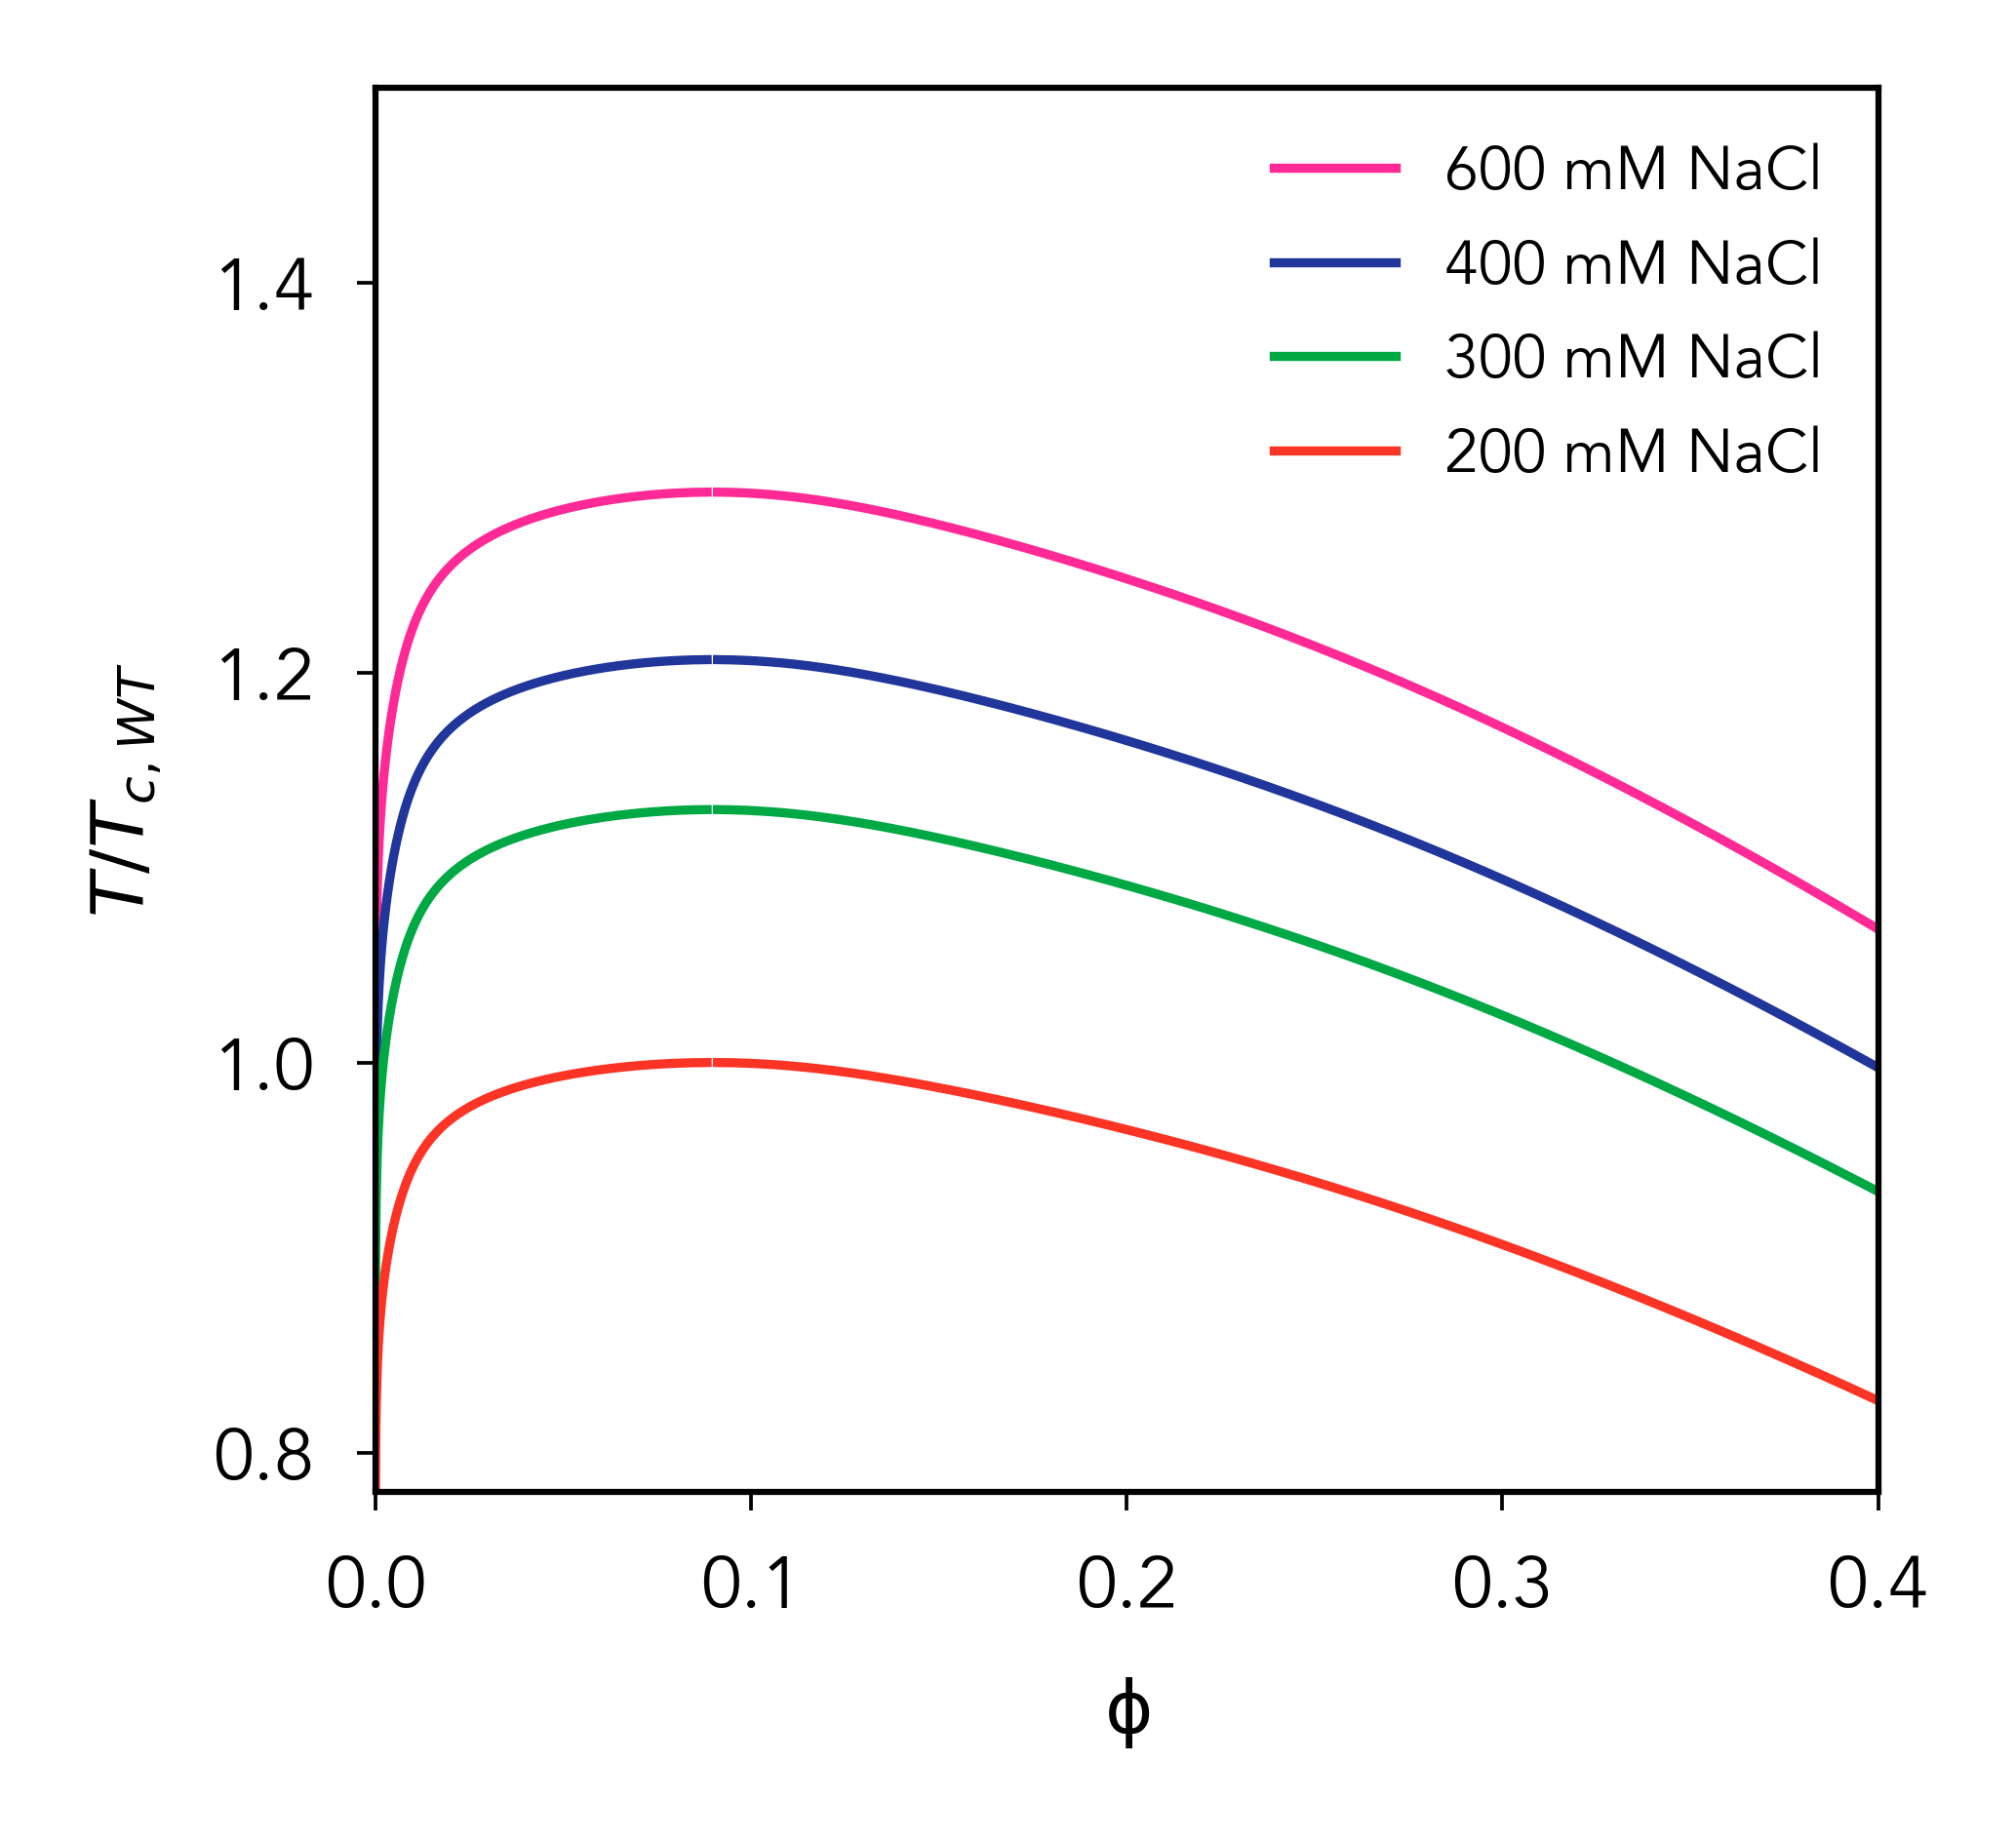

In [11]:
fig = plt.figure(figsize=(2.4, 2.2), dpi=450)

mf = Mpipi_frontend(salt=0.2)
B_base = mf.build_phase_diagram(cap)


mf = Mpipi_frontend(salt=0.6)
B4 = mf.build_phase_diagram(cap)
plt.plot(B4[0], B4[3]/max(B_base[3]), '#FF2A96', label='600 mM NaCl', linewidth=0.75)
plt.plot(B4[1], B4[3]/max(B_base[3]), '#FF2A96',linewidth=0.75)

mf = Mpipi_frontend(salt=0.4)
B3 = mf.build_phase_diagram(cap)
plt.plot(B3[0], B3[3]/max(B_base[3]), '#20369A', label='400 mM NaCl', linewidth=0.75)
plt.plot(B3[1], B3[3]/max(B_base[3]), '#20369A',linewidth=0.75)


mf = Mpipi_frontend(salt=0.3)
B2 = mf.build_phase_diagram(cap)
plt.plot(B2[0], B2[3]/max(B_base[3]), '#01A945', label='300 mM NaCl', linewidth=0.75)
plt.plot(B2[1], B2[3]/max(B_base[3]), '#01A945',linewidth=0.75)


mf = Mpipi_frontend(salt=0.2)
B1 = mf.build_phase_diagram(cap)
plt.plot(B1[0], B1[3]/max(B_base[3]), '#FB3425', label='200 mM NaCl', linewidth=0.75)
plt.plot(B1[1], B1[3]/max(B_base[3]), '#FB3425',linewidth=0.75)


plt.ylabel(r'$T/T_{c,WT}$', fontsize=6)
plt.xlabel(r'$\rm\phi$', fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.legend(fontsize=5, frameon=False)
plt.xlim([0, 0.4])
plt.ylim([0.78, 1.5])
plt.tight_layout()
plt.savefig('out_figures/caprin_phase_diagram.pdf')
